# WK02

사이킷런 데이터 활용

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
keys = iris_data.keys()
print('붗꽃 데이터 세트의 키들:', keys)

붗꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print('\n feature_names의 type:', type(iris_data.feature_names))
print('feature_names의shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('feature_names의shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('data의shape:', len(iris_data.data))
print(iris_data.data)

print('\n targets의 type:', type(iris_data.target))
print('target의shape:', len(iris_data.target))
print(iris_data.target)


 feature_names의 type: <class 'list'>
feature_names의shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
feature_names의shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의shape: 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3

사이킷런 분류모델 실습 - 퍼셉트론 훈련

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('y의 레이블 카운트:', np.bincount(y)) # bincunt함수 - 배열에 있는 고유한 값의 등장 횟수 헤아릴 수 있음
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [ ]:
from sklearn.preprocessing import StandardScaler # 최상의 성능을 위해 스케일 조정 필요 -> StandardScaler 클래스 사용하여 특성을 표준화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# 6week - 퍼셉트론
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [ ]:
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [ ]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978


퍼셉트론 모델이 만든 붓꽃 데이터셋의 결정 경계



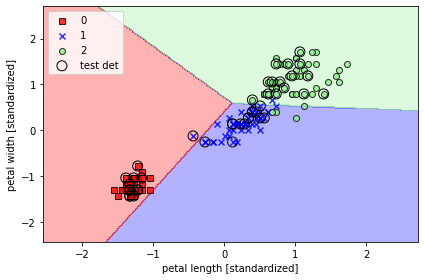

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # 마커와 컬러맵을 설정합니다
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계를 그립니다
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl,1],
                alpha=0.8, c=colors[idx],
                marker=markers[idx], label=cl,
                edgecolors='black')
    
  # 테스트 샘플을 부각하여 그립니다
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
                facecolors='none', edgecolors='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='test det')  
    
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, 
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# WK03

# 사이킷런 분류모델 실습 - 로지스틱회귀

시그모이드 곡선

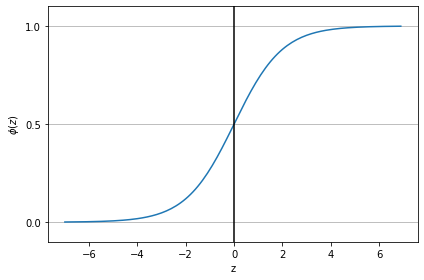

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(Z):
  return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

사이킷런의 로지스틱 회귀 모델이 만든 결정 경계

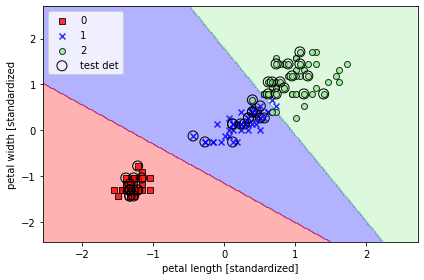

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
lr.predict(X_test_std[0,:].reshape(1, -1))

array([2])

규제 매개변수에 따른 가중치 크기의 변화

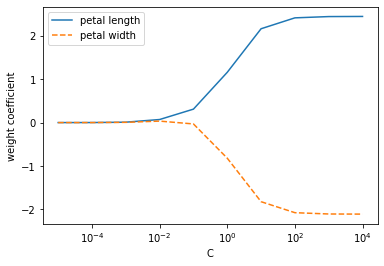

In [ ]:
weights, params = [], []
for c in np.arange(-5,5):
  lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],
         label ='petal length')
plt.plot(params, weights[:,1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

로지스틱 회귀 실습

In [ ]:
import pandas as pd
import numpy as np

# 사이킷런의 로지스틱 회귀 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# 타이타닉 데이터 불러오기
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# 맨 앞의 데이터 10개 출력
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [ ]:
# 데이터에 null이 포함되어 있는지 확인
data.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [ ]:
# 타겟 데이터 저장
target = data['Survived']

data.drop(labels=['Name', 'Survived'], axis=1, inplace=True)

# 성별 데이터를 숫자로 변환
data['Sex'] = data['Sex'].map({'male':0,
                               'female':1})

data

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,2,0,27.0,0,0,13.0000
883,1,1,19.0,0,0,30.0000
884,3,1,7.0,1,2,23.4500
885,1,0,26.0,0,0,30.0000


In [ ]:
# 훈련 데이터와 테스트 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=1)

In [ ]:
# 로지스틱 회귀 인스턴스 생성
lr = LogisticRegression()

# 훈련 데이터로 모델 훈련
lr.fit(train_input, train_target)

# 예측 결과 출력
print(lr.predict(test_input))

# 변수 종류 출력
print(data.head(0))

# 각 특징(변수, feature)들의 가중치
print(lr.coef_)

[0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1]
Empty DataFrame
Columns: [Pclass, Sex, Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare]
Index: []
[[-1.21951366  2.46247505 -0.05415586 -0.41426418  0.09799441  0.00355551]]


In [ ]:
# 내가 탔을 때를 가정한 조건
pred = lr.predict([[2, 1, 40.0, 0, 0, 10.0]])

if(pred[0] == 0):
  print('AI : 사망하실 것으로 예측됩니다.\n')
else:
  print('AI : 생존하실 것으로 예측됩니다.\n')

# 음성 클래스 / 양성 클래스의 확률
print('양성 클래스 / 음성 클래스 : {}'.format(lr.predict_proba([[2, 1, 40.0, 0, 0, 10.0]])))

AI : 생존하실 것으로 예측됩니다.

양성 클래스 / 음성 클래스 : [[0.29811857 0.70188143]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# 서포트 벡터 머신(SVM)

SVM 분류기가 학습한 붓꽃 데이터셋의 결정 경계

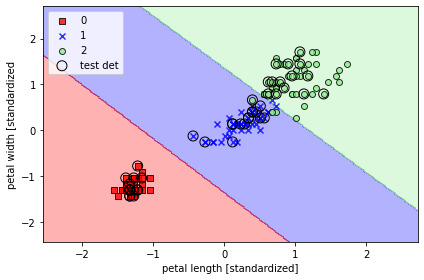

In [ ]:
# 6week - SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

커널 SVM을 사용하여 비선형 문제 풀기

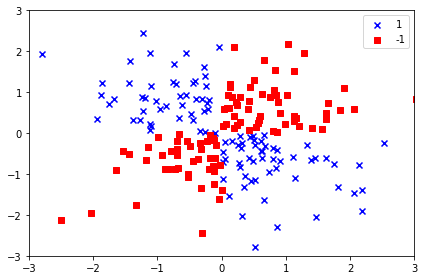

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0]>0,
                       X_xor[:,1]>0)

y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1,1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1,0],
            X_xor[y_xor == -1,1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# WK04

커널 svm 모델이 학습한 XOR 데이터셋의 결정 경계

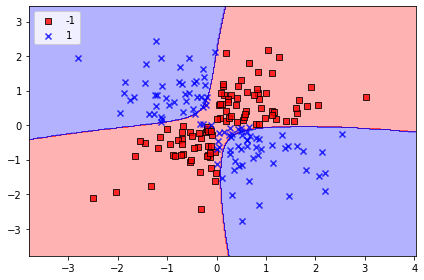

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

RBF 커널 SVM 모델이 학습한 붓꽃 데이터셋의 결정 경계

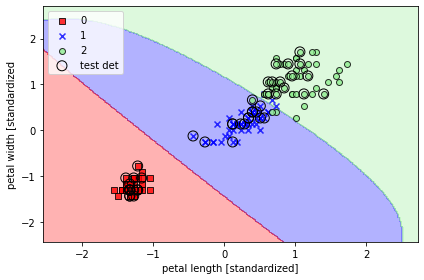

In [ ]:
# 6week - 커널 svm
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0) # gamma 값을 높임, 0.2
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

감마 매개변수를 크게 한 RBF 커널 SVM의 결정 경계

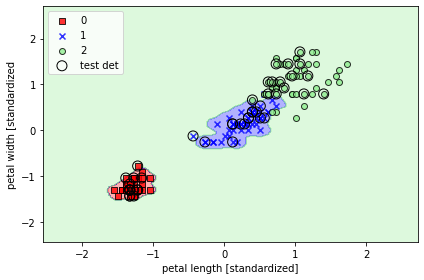

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0) # gamma 값을 더 높임, 100
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

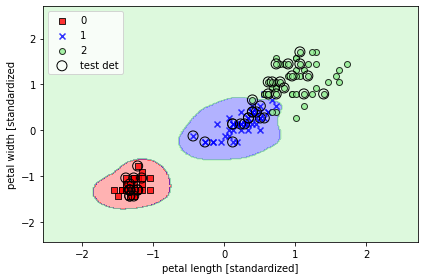

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=1.0) # gamma 값을 이전보다 낮춤, 10
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

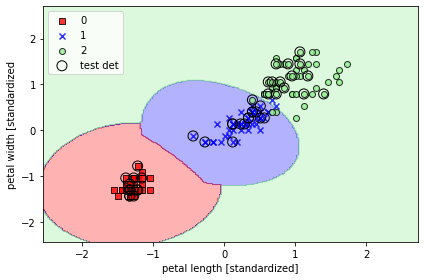

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=1.0, C=1.0) # gamma 값 : 1.0
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

* Kernel 변경

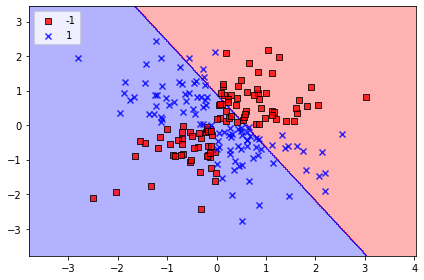

In [ ]:
# kernel - linear
svm = SVC(kernel='linear', random_state=1, C=100.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

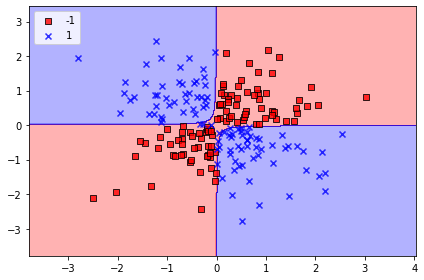

In [ ]:
# kernel - poly
svm = SVC(kernel='poly', degree=2, random_state=1, gamma=1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

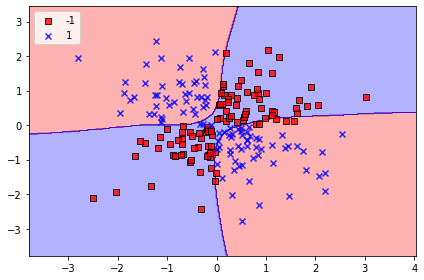

In [ ]:
# kernel - sigmoid
svm = SVC(kernel='sigmoid', random_state=1, gamma=2, coef0=2)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

올리베티 데이터셋과 SVM을 이용한 얼굴인식 실습

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


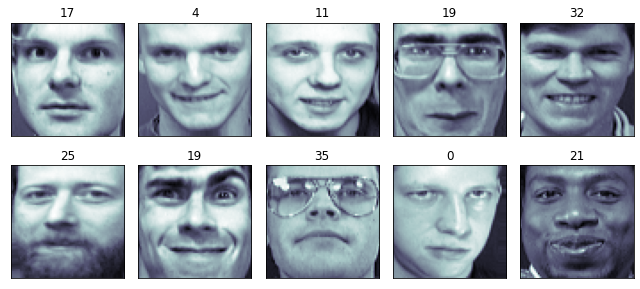

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
  for j in range(M):
    k = klist[i * M + j]
    ax = fig.add_subplot(N, M, i * M + j + 1)
    ax.imshow(faces.images[k], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title(faces.target[k])
plt.tight_layout()
plt.show()

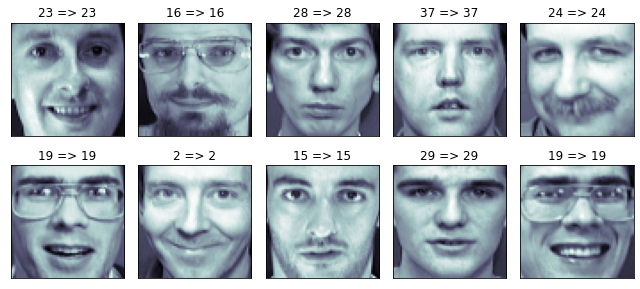

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
  for j in range(M):
    k = klist[i * M + j]
    ax = fig.add_subplot(N, M, i * M + j + 1)
    ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title("%d => %d" %
              (y_test[k], svc.predict(X_test[k:(k + 1), :]) [0]))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn .metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    

# WK05

# KNN을 이용한 mnist 데이터셋 분류 실습

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# 학습용 60,000개 / 검증용 10,000개
# 손글씨 한장 이미지는 28X28 =784개 pixel
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape) #(60000, 28, 28)
print(y_train.shape) #(60000,)

# 0번째 이미지 출력
for x in x_train[0]:
  for i in x:
    print('{:3}'.format(i), end='')
  print()

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0

In [ ]:
# 28X28 배열을 1차원 784개로 재배열
# 5000개로 테스트 수행
x_train = x_train.reshape(-1, 28*28)[:5000]
y_train = y_train[:5000]
x_test = x_test.reshape(-1, 28*28)[:5000]
y_test = y_test[:5000]
print(x_train.reshape, y_train.shape)
print(x_test.shape, y_test.shape)

<built-in method reshape of numpy.ndarray object at 0x7f79076a0150> (5000,)
(5000, 784) (5000,)


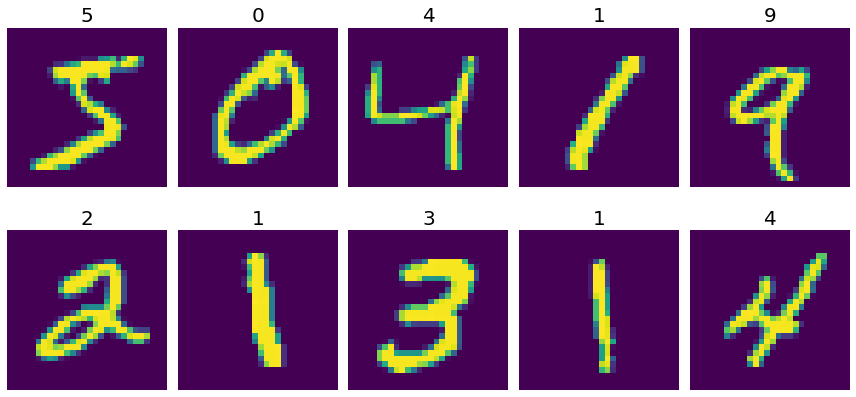

In [ ]:
import matplotlib.pyplot as plt

# 총 10개 이미지 2X5 그리드 형태로 그려보기
w, h = 2, 5
fig, axes = plt.subplots(w, h)
fig.set_size_inches(12, 6)
for i in range(w*h):
  axes[i//h, i%h].imshow(x_train[i].reshape(-1, 28))
  axes[i//h, i%h].set_title(y_train[i], fontsize=20)
  axes[i//h, i%h].axis('off')
plt.tight_layout()
plt.show()

KNN 실습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 모델 생성
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# 학습
knn.fit(x_train, y_train)

# 예측
prediction = knn.predict(x_test)

In [ ]:
# 모델평가 - 방법1
print((prediction == y_test).mean())
# 모델평가 - 방법2
print(knn.score(x_test, y_test))

0.906
0.906


In [ ]:
# 최적의 이웃수 찾기
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  knn.fit(x_train, y_train)
  score = knn.score(x_test, y_test)
  print('k: %d, accuracy: %.2f' % (k, score*100))

k: 1, accuracy: 91.08
k: 2, accuracy: 89.26
k: 3, accuracy: 90.82
k: 4, accuracy: 90.44
k: 5, accuracy: 90.60
k: 6, accuracy: 90.22
k: 7, accuracy: 90.02
k: 8, accuracy: 90.08
k: 9, accuracy: 89.74
k: 10, accuracy: 89.54
